In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


In [3]:
def create_attention_visualization(sentence):
    """
    Creates a simple visualization of self-attention weights between words in a sentence.
    """
    # Split the sentence into words
    words = sentence.split()
    n_words = len(words)
    
    # Create random attention weights (in practice, these would be learned)
    # Making them somewhat sparse for visualization purposes
    attention_weights = np.random.rand(n_words, n_words)
    # Apply softmax to make weights sum to 1 for each word
    attention_weights = np.exp(attention_weights) / np.sum(np.exp(attention_weights), axis=1, keepdims=True)
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, 
                xticklabels=words,
                yticklabels=words,
                cmap='Blues',
                annot=True,
                fmt='.2f')
    plt.title('Self-Attention Weights Between Words')
    plt.xlabel('Keys/Values')
    plt.ylabel('Queries')
    
    return attention_weights

In [2]:
def compute_weighted_sum(sentence, attention_weights):
    """
    Demonstrates how attention weights are used to create context-aware representations
    """
    words = sentence.split()
    n_words = len(words)
    
    # Create simple word vectors (in practice, these would be embeddings)
    # Using random vectors for demonstration
    word_vectors = np.random.rand(n_words, 3)  # 3-dimensional for simplicity
    
    # Compute attention-weighted sums
    weighted_representations = np.dot(attention_weights, word_vectors)
    
    # Create a nice display of the results
    results = []
    for i, word in enumerate(words):
        results.append(f"Contextual representation for '{word}':")
        results.append(f"Original vector: {word_vectors[i]}")
        results.append(f"After attention: {weighted_representations[i]}")
        results.append("")
    
    return "\n".join(results)


In [6]:
# Demonstrate QK multiplication in self-attention

# Create Q (query) and K (key) matrices with a mix of similar and dissimilar vectors
Q = np.array([[0.1, 0.2, 0.3],   # Similar to first row of K
              [-0.7, -0.8, 0.9], # Dissimilar to all rows of K (with negative values)
              [0.4, 0.5, 0.6]])  # Similar to last row of K

K = np.array([[0.15, 0.25, 0.35],   # Similar to first row of Q
              [-0.9, -0.8, 0.7],    # Dissimilar to all rows of Q (with negative values)
              [0.45, 0.55, 0.65]])  # Similar to last row of Q

# Perform the dot product
QK = np.dot(Q, K.T)

# Print matrices and results
print("Query matrix (Q):")
print(Q)
print("\nKey matrix (K):")
print(K)
print("\nTranspose of K:")
print(K.T)
print("\nResult of Q * K^T:")
print(QK)

# Analyze the results
print("\nAnalysis:")
print("1. The (0,0) element of QK is relatively high because Q[0] and K[0] are similar.")
print("2. The (2,2) element of QK is also relatively high because Q[2] and K[2] are similar.")
print("3. The (1,1) element of QK is lower because Q[1] and K[1] are dissimilar.")
print("4. Off-diagonal elements tend to be lower due to less similarity between different rows of Q and K.")

# Calculate and print the softmax of QK
softmax_QK = np.exp(QK) / np.sum(np.exp(QK), axis=1, keepdims=True)
print("\nSoftmax of Q * K^T:")
print(softmax_QK)
print("\nNote how the softmax operation emphasizes the highest values in each row.")


Query matrix (Q):
[[ 0.1  0.2  0.3]
 [-0.7 -0.8  0.9]
 [ 0.4  0.5  0.6]]

Key matrix (K):
[[ 0.15  0.25  0.35]
 [-0.9  -0.8   0.7 ]
 [ 0.45  0.55  0.65]]

Transpose of K:
[[ 0.15 -0.9   0.45]
 [ 0.25 -0.8   0.55]
 [ 0.35  0.7   0.65]]

Result of Q * K^T:
[[ 0.17  -0.04   0.35 ]
 [ 0.01   1.9   -0.17 ]
 [ 0.395 -0.34   0.845]]

Analysis:
1. The (0,0) element of QK is relatively high because Q[0] and K[0] are similar.
2. The (2,2) element of QK is also relatively high because Q[2] and K[2] are similar.
3. The (1,1) element of QK is lower because Q[1] and K[1] are dissimilar.
4. Off-diagonal elements tend to be lower due to less similarity between different rows of Q and K.

Softmax of Q * K^T:
[[0.33246874 0.26949392 0.39803734]
 [0.11827826 0.78292743 0.09879431]
 [0.32810362 0.15732748 0.5145689 ]]

Note how the softmax operation emphasizes the highest values in each row.


In [10]:
# Example usage
sentence = "We the people of the United States do ordain this Constitution."

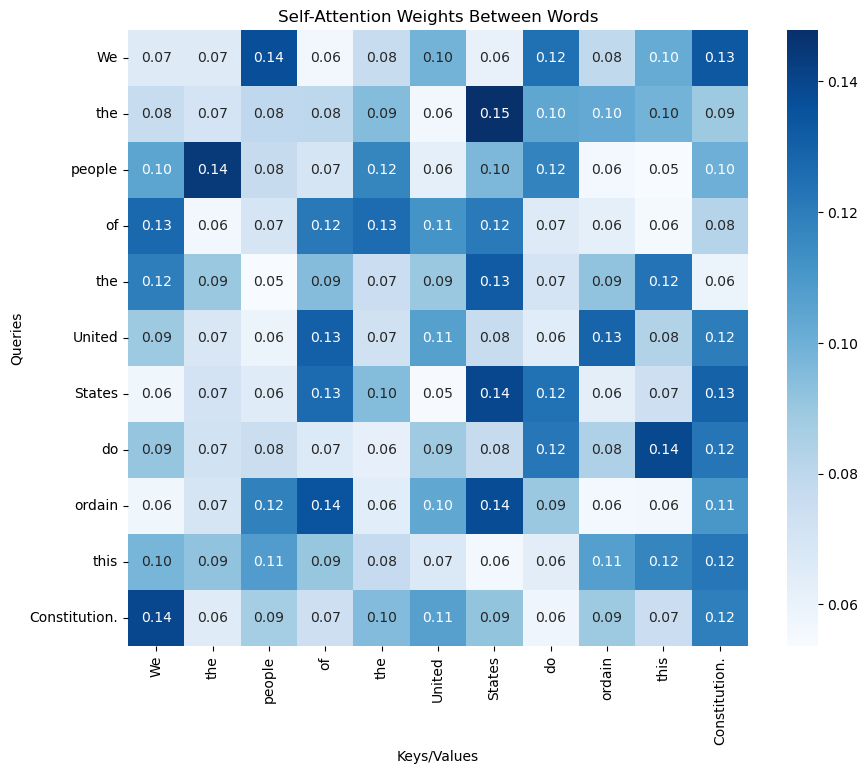

Contextual representation for 'We':
Original vector: [0.65503991 0.65402704 0.9890274 ]
After attention: [0.39171575 0.56100926 0.66272138]

Contextual representation for 'the':
Original vector: [0.0374425  0.07094187 0.81157724]
After attention: [0.47503771 0.59070079 0.64804888]

Contextual representation for 'people':
Original vector: [0.14941028 0.49920871 0.95352657]
After attention: [0.42741177 0.51637803 0.71002478]

Contextual representation for 'of':
Original vector: [0.7738792  0.38617129 0.59867284]
After attention: [0.50717305 0.52132715 0.66762735]

Contextual representation for 'the':
Original vector: [0.72140254 0.16958817 0.6678022 ]
After attention: [0.47625047 0.56206556 0.62384596]

Contextual representation for 'United':
Original vector: [0.20538952 0.14500537 0.28575587]
After attention: [0.47393211 0.54347408 0.61626734]

Contextual representation for 'States':
Original vector: [0.86531915 0.90605202 0.74621081]
After attention: [0.48237134 0.57825609 0.67873213]


In [12]:

# First, visualize attention weights
attention_weights = create_attention_visualization(sentence)
plt.show()

# Then show how these weights create context-aware representations
print(compute_weighted_sum(sentence, attention_weights))



In [13]:
# Add an interactive visualization
def create_interactive_attention(sentence):
    words = sentence.split()
    n_words = len(words)
    attention_weights = np.random.rand(n_words, n_words)
    attention_weights = np.exp(attention_weights) / np.sum(np.exp(attention_weights), axis=1, keepdims=True)
    
    # Create an HTML table with hover effects
    html = """
    <style>
    .attention-cell { padding: 10px; transition: all 0.3s; }
    .attention-cell:hover { background-color: #ffeb3b; transform: scale(1.1); }
    </style>
    <table border="1" style="border-collapse: collapse;">
    """
    
    # Add header row
    html += "<tr><td></td>"
    for word in words:
        html += f"<td style='padding: 10px; font-weight: bold;'>{word}</td>"
    html += "</tr>"
    
    # Add data rows
    for i, query_word in enumerate(words):
        html += f"<tr><td style='padding: 10px; font-weight: bold;'>{query_word}</td>"
        for j, key_word in enumerate(words):
            weight = attention_weights[i, j]
            bgcolor = f"rgba(0, 0, 255, {weight:.2f})"
            html += f"""
            <td class='attention-cell' style='background-color: {bgcolor}; color: {'white' if weight > 0.5 else 'black'}'>
                {weight:.2f}
            </td>"""
        html += "</tr>"
    html += "</table>"
    
    return HTML(html)

In [14]:
create_interactive_attention(sentence)


,We,the,people,of,the,United,States,do,ordain,this,Constitution.
We,0.05,0.10,0.09,0.11,0.09,0.12,0.06,0.12,0.05,0.08,0.13
the,0.09,0.13,0.06,0.12,0.06,0.11,0.10,0.10,0.08,0.06,0.09
people,0.08,0.08,0.08,0.14,0.09,0.09,0.10,0.10,0.06,0.10,0.09
of,0.12,0.08,0.10,0.09,0.11,0.12,0.06,0.08,0.07,0.06,0.12
the,0.10,0.06,0.10,0.06,0.11,0.13,0.06,0.07,0.11,0.14,0.08
United,0.13,0.06,0.07,0.08,0.06,0.11,0.14,0.09,0.08,0.12,0.06
States,0.06,0.10,0.06,0.11,0.12,0.11,0.07,0.09,0.09,0.07,0.12
do,0.08,0.11,0.13,0.08,0.09,0.08,0.07,0.06,0.13,0.09,0.09
ordain,0.06,0.12,0.10,0.05,0.12,0.05,0.13,0.08,0.09,0.11,0.08
this,0.12,0.08,0.06,0.09,0.09,0.08,0.14,0.14,0.06,0.06,0.06
